In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('/content/sample_data/house_data_fs.csv', index_col = 0)
df = df.dropna()
df1 = df.head(50)

In [19]:
df1.shape

(50, 3)

In [ ]:
df1

,price,bedrooms,sqft_living
0,221900,3.0,1180
1,538000,3.0,2570
2,180000,2.0,770
3,604000,4.0,1960
4,510000,3.0,1680
5,1225000,4.0,5420
6,257500,3.0,1715
7,291850,3.0,1060
8,229500,3.0,1780
9,323000,3.0,1890


In [9]:
df1.describe()

,price,bedrooms,sqft_living
count,5.000000e+01,50.000000,50.00000
mean,5.324386e+05,3.320000,2023.66000
std,3.300102e+05,0.740656,905.51901
min,1.800000e+05,2.000000,770.00000
25%,2.961375e+05,3.000000,1302.50000
50%,4.865000e+05,3.000000,1795.00000
75%,6.593750e+05,4.000000,2450.00000
max,2.000000e+06,5.000000,5420.00000


### Linear regression model using a single feature

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

lr = LinearRegression()
model = lr.fit(X_scaled, y)

In [11]:

y_pred = model.predict(X_scaled)

# Print model parameters
print("Model Coefficient (slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mean_squared_error(y, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y, y_pred))

Model Coefficient (slope): 211051.60498043548
Model Intercept: 532438.6
Mean Squared Error (MSE): 62185849719.2222
Mean Absolute Error (MAE): 161171.373785871


### Visualization for Linear Regression model

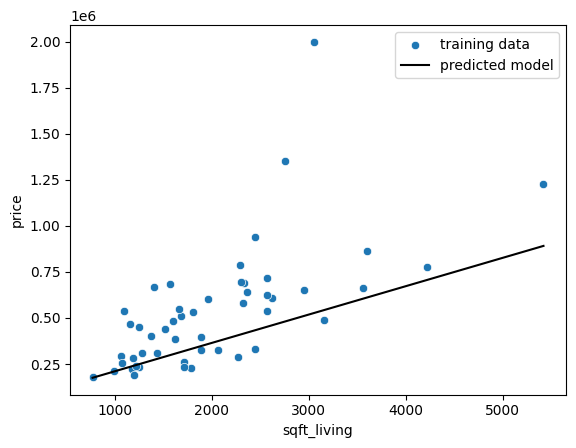

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
y_model = model.predict(scaler.fit_transform(x_model.reshape(-1,1)))
plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model'])
plt.show()


📐 Degree 1
R² Score: 0.4173
Mean Squared Error: 62185849719.22
Mean Absolute Error: 161171.37


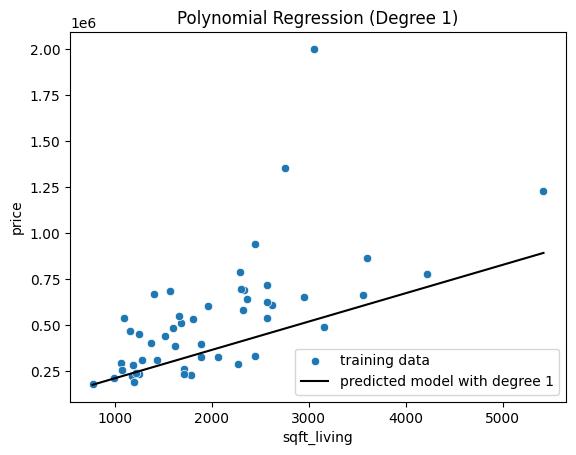


📐 Degree 2
R² Score: 0.4285
Mean Squared Error: 60999286388.34
Mean Absolute Error: 157625.27


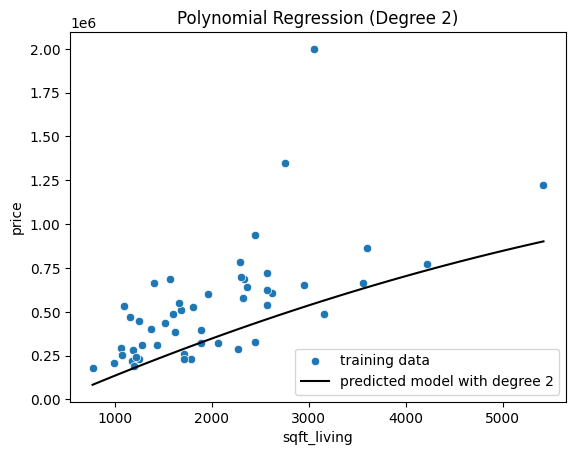


📐 Degree 5
R² Score: 0.478
Mean Squared Error: 55715230172.06
Mean Absolute Error: 161830.17


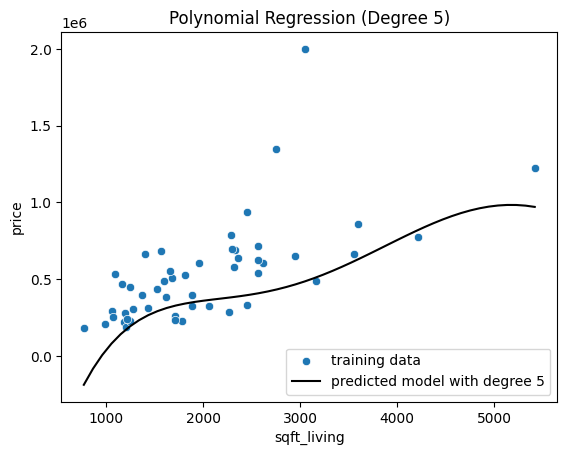


📐 Degree 10
R² Score: 0.5353
Mean Squared Error: 49596225121.88
Mean Absolute Error: 158636.35


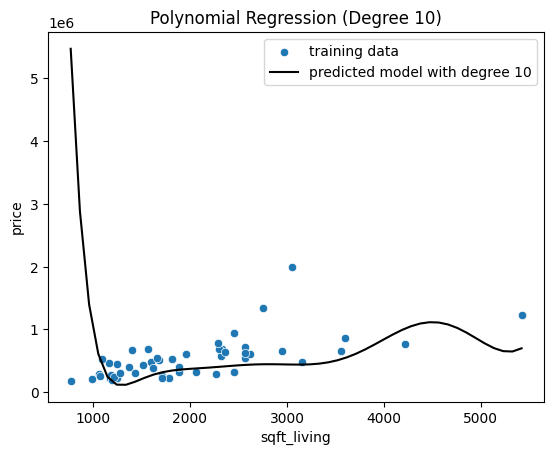

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
X = df1['sqft_living'].values.reshape(-1, 1)
y = df1['price'].values

# Degrees to test
degrees = [1, 2, 5, 10]

for order in degrees:
    # Standard scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Polynomial transformation
    poly = PolynomialFeatures(degree=order, include_bias=False)
    poly_features = poly.fit_transform(X_scaled)

    # Train model
    model = LinearRegression()
    model.fit(poly_features, y)

    # Predictions and evaluation
    Y_pred = model.predict(poly_features)
    r2 = model.score(poly_features, y)
    mse = mean_squared_error(y, Y_pred)
    mae = mean_absolute_error(y, Y_pred)

    print(f"\n📐 Degree {order}")
    print("R² Score:", round(r2, 4))
    print("Mean Squared Error:", round(mse, 2))
    print("Mean Absolute Error:", round(mae, 2))

    # 🎨 Visualization (your exact style)
    sns.scatterplot(data=df1, x='sqft_living', y='price')
    x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50).reshape(-1, 1)
    x_model_scaled = scaler.fit_transform(x_model)
    x_model_poly = poly.fit_transform(x_model_scaled)
    y_model = model.predict(x_model_poly)

    plt.plot(x_model, y_model, color='k')
    plt.legend(['training data', f'predicted model with degree {order}'])
    plt.title(f'Polynomial Regression (Degree {order})')
    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.show()


### Polynomial regression :
1) Feature scaling and Transform poly features
2) model using a linear regression.
3) Predict using the Model

In [14]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

# Poly transformation
order = 5
poly = PolynomialFeatures(degree=order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

# Modeling.
lr = LinearRegression()
model = lr.fit(poly_features, y)
print(model.coef_, model.intercept_)

#Prediction

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)

print('r2-score:', np.round(rscore), '\nmean squared error:', np.round(mse), '\nmean absolute error:', np.round(mae))


[303012.02984126 191876.41167818 -44143.55845641 -79088.84962854
  19894.7415532 ] 495512.6391591308
r2-score: 0.0 
mean squared error: 55715230172.0 
mean absolute error: 161830.0


### Visualization for Poly regression

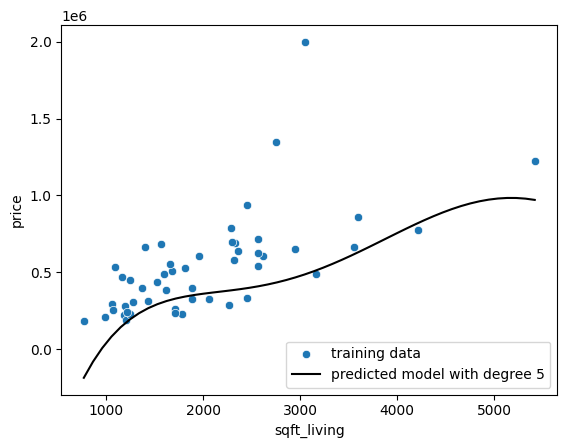

In [15]:
sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))

x_model_poly  = poly.fit_transform(x_model_scaled)
y_model = model.predict(x_model_poly)

plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model with degree ' + str(order)])
plt.show()

### Saving Best Model for Deployment

In [16]:
import joblib
best_order = 2
X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

poly = PolynomialFeatures(degree=best_order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

lr = LinearRegression()
model = lr.fit(poly_features, y)

joblib.dump(model,'best_model.pkl')

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)

In [18]:
print(rscore,mse,mae)


0.4284636974265923 60999286388.34267 157625.26745223164


In [ ]:
joblib.dump(model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(poly, 'poly.pkl')


['poly.pkl']

In [ ]:

model = joblib.load('best_model.pkl')
scaler = joblib.load('scaler.pkl')
poly = joblib.load('poly.pkl')

new_sqft = np.array([[2000]])

scaled_input = scaler.transform(new_sqft)
poly_input = poly.transform(scaled_input)

predicted_price = model.predict(poly_input)
print("Predicted price:", predicted_price[0])


Predicted price: 547191.8176458275


In [ ]:
new_sqft = np.array([[400]])

scaled_input = scaler.transform(new_sqft)
poly_input = poly.transform(scaled_input)

predicted_price = model.predict(poly_input)
print("Predicted price: {:.2f}".format(predicted_price[0]))

Predicted price: 47959.36


In [ ]:
new_sqft = np.array([[0]])

scaled_input = scaler.transform(new_sqft)
poly_input = poly.transform(scaled_input)

predicted_price = model.predict(poly_input)
print("Predicted price: {:.2f}".format(predicted_price[0]))

Predicted price: -97880.69


In [ ]:
new_sqft = np.array([[100]])
scaled_input = scaler.transform(new_sqft)
poly_input = poly.transform(scaled_input)

predicted_price = model.predict(poly_input)
print("Predicted price: {:.2f}".format(predicted_price[0]))

Predicted price: -60631.98


In [ ]:
print(model)

LinearRegression()


In [ ]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [240878.63506291 -21125.66947931]
Intercept: 553564.2694793064
